# Analysis of KCCA Facebook posts for @kccaug page (12th-27th Oct 2020)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime as dt

In [21]:
plt.rcParams["figure.figsize"] = (15,7)
sns.set_style('darkgrid')

In [3]:
pd.set_option("display.max.columns", None)

## Initial study of KCCA dataset

In [4]:
posts = pd.read_csv('../data/KCCA-Oct-12-27-posts.csv')

In [6]:
posts.head()

,Page Name,User Name,Facebook Id,Likes at Posting,Created,Type,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Overperforming Score
0,Kampala Capital City Authority - KCCA,kccaug,273186819404795,73405,2020-10-27 10:55:09 EAT,Photo,108,10,11,1,0,0,0,0,0,NaN,0,0,0,NaN,https://www.facebook.com/kccaug/posts/35807259...,"Its 4 days to Weyonje monthly Cleanup, keeping...",https://www.facebook.com/kccaug/photos/a.27321...,NaN,NaN,NaN,NaN,NaN,NaN,-1.48
1,Kampala Capital City Authority - KCCA,kccaug,273186819404795,73398,2020-10-26 16:24:19 EAT,Photo,88,35,7,1,0,0,0,0,0,NaN,0,0,0,NaN,https://www.facebook.com/kccaug/posts/35785984...,The Precinct Physical Development Plans for Ko...,https://www.facebook.com/kccaug/photos/a.27321...,NaN,NaN,NaN,NaN,NaN,NaN,-1.65
2,Kampala Capital City Authority - KCCA,kccaug,273186819404795,73375,2020-10-24 17:23:17 EAT,Photo,301,27,24,2,0,0,0,0,0,NaN,0,0,0,NaN,https://www.facebook.com/kccaug/posts/35732544...,KCCA Executive Director made an on spot tour o...,https://www.facebook.com/kccaug/photos/a.27321...,https://www.facebook.com/login/?next=https%3A%...,NaN,Photos from Kampala Capital City Authority - K...,NaN,NaN,NaN,1.51
3,Kampala Capital City Authority - KCCA,kccaug,273186819404795,73369,2020-10-22 16:23:41 EAT,Photo,139,12,1,2,0,0,0,0,2,NaN,0,0,0,NaN,https://www.facebook.com/kccaug/posts/35675247...,As you sit back in your living room or on your...,https://www.facebook.com/kccaug/photos/a.60884...,https://www.facebook.com/login/?next=https%3A%...,NaN,NaN,NaN,NaN,NaN,-1.57
4,Kampala Capital City Authority - KCCA,kccaug,273186819404795,73369,2020-10-22 08:15:26 EAT,Photo,228,3,5,3,0,0,0,0,1,NaN,0,0,0,NaN,https://www.facebook.com/kccaug/posts/35666668...,KCCA Executive Director paid a courtesy call o...,https://www.facebook.com/KCCAED/photos/a.18019...,NaN,NaN,KCCA Executive Director,It was a pleasure meeting the Rt Hon Rebecca A...,NaN,NaN,-1.02


In [7]:
posts.shape

(16, 30)

### Check for posts with no `Message` (possibly picture-only or video-only posts)

In [11]:
posts['Message'].isna().sum()
# posts.isna()

0

# Annotation

### Create dataset in the right format for annotation

In [15]:
posts2 = posts[['Created']]
posts2['text'] = posts['Message']
posts2['label'] = ''
posts2.head(10)

,Created,text,label
0,2020-10-27 10:55:09 EAT,"Its 4 days to Weyonje monthly Cleanup, keeping...",
1,2020-10-26 16:24:19 EAT,The Precinct Physical Development Plans for Ko...,
2,2020-10-24 17:23:17 EAT,KCCA Executive Director made an on spot tour o...,
3,2020-10-22 16:23:41 EAT,As you sit back in your living room or on your...,
4,2020-10-22 08:15:26 EAT,KCCA Executive Director paid a courtesy call o...,
5,2020-10-21 22:18:33 EAT,Our appreciation to Multi Choice Uganda who to...,
6,2020-10-21 15:34:41 EAT,Our Dir. Education & Social Services officiate...,
7,2020-10-21 08:09:08 EAT,As we come closer to our monthly #KampalaWeyon...,
8,2020-10-19 09:36:06 EAT,"Last month, we launched the monthly #KampalaWe...",
9,2020-10-17 16:31:33 EAT,"Earlier on today, our team led by KCCA Executi...",


In [16]:
posts2.to_csv('../data/KCCA-Oct-12-27-posts-for-annotation.csv')

### Analyze annotated data

In [15]:
annotated_posts = pd.read_csv('../data/KCCA-Oct-12-27-posts-annotated.csv')
annotated_posts.head()

,annotation_approver,id,label,meta,meta.Created,text,user
0,NaN,8896,51,0,2020-10-27 10:55:09 EAT,"Its 4 days to Weyonje monthly Cleanup, keeping...",2
1,NaN,8897,51,1,2020-10-26 16:24:19 EAT,The Precinct Physical Development Plans for Ko...,2
2,NaN,8898,51,2,2020-10-24 17:23:17 EAT,KCCA Executive Director made an on spot tour o...,2
3,NaN,8899,51,3,2020-10-22 16:23:41 EAT,As you sit back in your living room or on your...,2
4,NaN,8900,51,4,2020-10-22 08:15:26 EAT,KCCA Executive Director paid a courtesy call o...,2


In [16]:
annotated_posts['category'] = annotated_posts['label'].astype('category')

In [17]:
annotated_posts['category'].cat.categories = ['COVID', 'Non-COVID']
annotated_posts.head(10)

,annotation_approver,id,label,meta,meta.Created,text,user,category
0,NaN,8896,51,0,2020-10-27 10:55:09 EAT,"Its 4 days to Weyonje monthly Cleanup, keeping...",2,Non-COVID
1,NaN,8897,51,1,2020-10-26 16:24:19 EAT,The Precinct Physical Development Plans for Ko...,2,Non-COVID
2,NaN,8898,51,2,2020-10-24 17:23:17 EAT,KCCA Executive Director made an on spot tour o...,2,Non-COVID
3,NaN,8899,51,3,2020-10-22 16:23:41 EAT,As you sit back in your living room or on your...,2,Non-COVID
4,NaN,8900,51,4,2020-10-22 08:15:26 EAT,KCCA Executive Director paid a courtesy call o...,2,Non-COVID
5,NaN,8901,50,5,2020-10-21 22:18:33 EAT,Our appreciation to Multi Choice Uganda who to...,2,COVID
6,NaN,8902,51,6,2020-10-21 15:34:41 EAT,Our Dir. Education & Social Services officiate...,2,Non-COVID
7,NaN,8903,51,7,2020-10-21 08:09:08 EAT,As we come closer to our monthly #KampalaWeyon...,2,Non-COVID
8,NaN,8904,51,8,2020-10-19 09:36:06 EAT,"Last month, we launched the monthly #KampalaWe...",2,Non-COVID
9,NaN,8905,51,9,2020-10-17 16:31:33 EAT,"Earlier on today, our team led by KCCA Executi...",2,Non-COVID


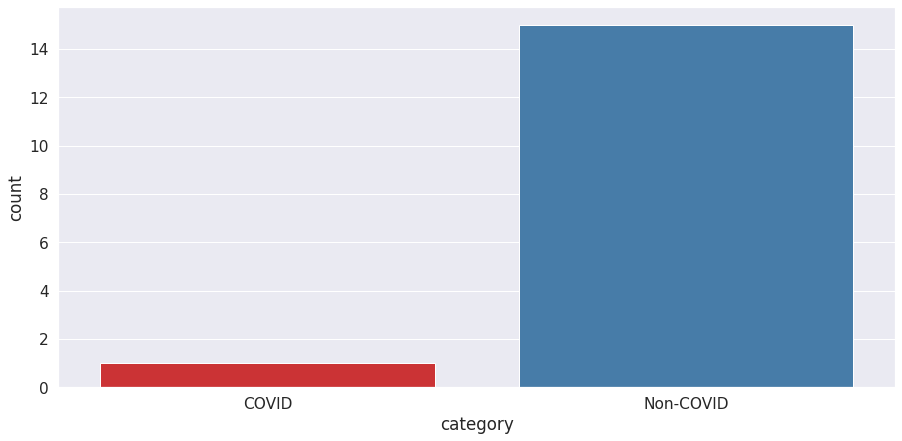

In [26]:
sns.countplot(x='category', data=annotated_posts, palette='Set1')